## __APPSTAT_01. <br>Простейшая теория вероятностей__
***

### __Базовые операции над множествами в python__
На [диаграмме Венна](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%B5%D0%BD%D0%BD%D0%B0) для 3 множеств занумеруйте сегменты, соотнесите их с соответствующими множествами и с помощью [операций над множествами в python](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) определите, какие из приведенных равенств являются верными.

$
(A \cup B) \setminus C = (A \setminus C) \cup (B \setminus C)
\\ (A \cap B) \cup C = (A \cap C) \cup (B \cap C)
\\ (A \cap B) \setminus C = (A \setminus C) \cap B
\\ (A \cap B) \cup C = (A \cup C) \cap (B \cup C)
$
***

### __Моделирование простейших вероятностных пространств__

In [1]:
from itertools import product, combinations_with_replacement, chain
from sympy import FiniteSet, PowerSet, Rational, Symbol, Eq
from sympy.stats import Die, Coin, Binomial, density, P

[Прямое (декартово) произведение](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D1%8F%D0%BC%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5)

In [2]:
# пространство элементарных исходов эксперимента 2-кратного подбрасывания
# правильного тетраэдра, в вершинах которого написаны числа 1, 2, 3, 4
set(product(range(1, 5), range(1, 5)))  # заменяет конструкцию "цикл в цикле"

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)}

In [3]:
# то же средствами sympy
tetrahedron = FiniteSet(*range(1, 5))
set(tetrahedron**2)

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)}

In [4]:
# если важен только состав элементов
set(combinations_with_replacement(range(1, 5), 2))

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 3),
 (3, 4),
 (4, 4)}

[Булеан](https://ru.wikipedia.org/wiki/%D0%91%D1%83%D0%BB%D0%B5%D0%B0%D0%BD)

In [5]:
# итератор средствами стандартной библиотеки
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [6]:
# то же средствами sympy
PowerSet(FiniteSet(*range(1, 4))).rewrite(FiniteSet)

FiniteSet(EmptySet, {1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3})

In [7]:
# fair/честные/правильные монеты готовым классом sympy
# H - heads/орел, T - tails/решка
C1, C2 = Coin('C1'), Coin('C2')
density(C1).dict  # {T: 1/2, H: 1/2}, словарь "исход: вероятность исхода"

{T: 1/2, H: 1/2}

In [8]:
# симуляция 2-кратного подбрасывания правильной монеты готовым классом sympy
density(C1+C2).dict  # {2*H: 1/4, H + T: 1/2, 2*T: 1/4}

{2*H: 1/4, H + T: 1/2, 2*T: 1/4}

In [9]:
# unfair coin/нечестная/неправильная монета готовым классом sympy
C3 = Coin('C3', Rational(3, 4))
density(C3).dict  # {T: 1/4, H: 3/4}

{T: 1/4, H: 3/4}

In [10]:
# симуляция 5-кратного подбрасывания правильной монеты биномиальным распределением
n = Symbol('n', positive=True, integer=True)
X = Binomial('X', n, Rational(1, 2), 'Орел', 'Решка')
density(X).dict.subs(n, 5).doit()
# {5*Решка: 1/32,
#  Орел + 4*Решка: 5/32,
#  2*Орел + 3*Решка: 5/16,
#  3*Орел + 2*Решка: 5/16,
#  4*Орел + Решка: 5/32,
#  5*Орел: 1/32}

{5*Решка: 1/32,
 Орел + 4*Решка: 5/32,
 2*Орел + 3*Решка: 5/16,
 3*Орел + 2*Решка: 5/16,
 4*Орел + Решка: 5/32,
 5*Орел: 1/32}

In [11]:
# классические игральные кости
D1, D2 = Die('D1', 6), Die('D2', 6)
density(D1).dict  # {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

{1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}

In [12]:
# распределение вероятностей дискретной случайной величины - 
# суммы выпавших очков:
# {2: 1/36, 3: 1/18, 4: 1/12, 5: 1/9, 6: 5/36, 7: 1/6, 
#  8: 5/36, 9: 1/9, 10: 1/12, 11: 1/18, 12: 1/36}
dens = density(D1+D2).dict
dens

{2: 1/36,
 3: 1/18,
 4: 1/12,
 5: 1/9,
 6: 5/36,
 7: 1/6,
 8: 5/36,
 9: 1/9,
 10: 1/12,
 11: 1/18,
 12: 1/36}

In [13]:
# вероятность события "сумма выпавших очков равна 8"
dens[8]  # 5/36, обращение по ключу

5/36

In [14]:
# вероятность события "сумма выпавших очков больше 8"
P(D1+D2 > 8)  # 5/18

5/18

In [15]:
# вероятность события "произведение выпавших очков нечетно"
P(Eq(D1*D2 % 2, 1))  # 1/4

1/4

***

### __Комбинаторика__

Комбинаторные функции и итераторы в стандартной библиотеке python:
<br>[модуль __`math`__](https://docs.python.org/3/library/math.html#module-math)
| [модуль __`itertools`__](https://docs.python.org/3/library/itertools.html#module-itertools)

In [16]:
# from math import comb, perm, factorial
# from itertools import product, permutations, combinations, combinations_with_replacement

Обратите внимание на то, что объекты __`itertools`__ это итераторы. Итератор работает лишь до опустошения. Пустой итератор ничего не отдает, поэтому если в коде требуется переиспользование, дренируйте итератор коллекцией - например, списком. Более специфичные, в т.ч. комбинаторные, итераторы можно найти в библиотеке [__`more-itertools`__](https://more-itertools.readthedocs.io/en/stable/).

Ввиду быстрого переполнения памяти и низкой скорости не стоит считать сочетания, они же биномиальные коэффициенты, с помощью __`math.factorial`__ - пожалуйста, используйте либо __`math.comb`__, либо [__`scipy.special.binom`__](https://scipy.github.io/devdocs/reference/generated/scipy.special.binom.html#scipy-special-binom).

### __Разбор задач по комбинаторике__

In [17]:
from math import comb, perm, factorial, ceil
from itertools import combinations, permutations
from collections import defaultdict

__Задача №1__. _В магазине было продано 21 из 25 холодильников трех марок, имеющихся в количествах 5, 7 и 13 штук. Полагая, что вероятность быть проданым для холодильника каждой марки одна и та же, найти вероятность того, что остались нераспроданными холодильники: а) одной марки; б) трех разных марок_.

__Решение__. а) Пусть событие $A$ - остались нераспроданными холодильники одной марки. Общее число способов, которыми можно получить 4 непроданных холодильника из 25, равно

In [18]:
n = comb(25, 4)
n  # 12650

12650

Число способов, которыми можно получить 4 холодильника первой марки из 5, второй марки из 7 и третьей марки из 13, соответственно равно

In [19]:
m1 = comb(5, 4)   # 5
m2 = comb(7, 4)   # 35
m3 = comb(13, 4)  # 715
print(f'{m1=}, {m2=}, {m3=}')

m1=5, m2=35, m3=715


Событию $A$ по _правилу суммы_ благоприятствует __`m1 + m2 + m3`__ случаев. Вероятность события $A$:

In [20]:
(m1 + m2 + m3) / n  # 0.059683794466403164

0.059683794466403164

б) Пусть событие $B$ - остались нераспроданными холодильники трех разных марок. Событие $B$ может произойти по одному из трех вариантов. По первому варианту событие $B$ произойдет, если останутся нераспроданными 1, 1, 2 холодильников соответственно 1-ой, 2-ой и 3-ей марок; по второму варианту - 1, 2, 1 и по третьему  варианту останутся нераспроданными 2, 1, 1 холодильников соответственно 1-ой, 2-ой и 3-ей марок. Так как до продажи имелось 5 холодильников 1-ой марки, 7 - 2-ой и 13 - 3-ей марки, то по _правилу произведения_ число случаев, благоприятствующих первому, второму и третьему вариантам, соответственно равно

In [21]:
m1 = comb(5, 1) * comb(7, 1) * comb(13, 2)  # 2730
m2 = comb(5, 1) * comb(7, 2) * comb(13, 1)  # 1365
m3 = comb(5, 2) * comb(7, 1) * comb(13, 1)  # 910
print(f'{m1=}, {m2=}, {m3=}')

m1=2730, m2=1365, m3=910


Общее число случаев, благоприятствующих событию $B$, равно __`m1 + m2 + m3`__. Вероятность события $B$: 

In [22]:
(m1 + m2 + m3) / n  # 0.39565217391304347

0.39565217391304347

__Решение моделированием вероятностного пространства в python__ <br>Метод, безусловно, грубый по соображениям скорости и потребляемой памяти и потому вторичный по отношению к чистому комбинаторному решению, но может выручить, когда решить элегантно не удается. Достоинство метода его интуитивная простота: сконструируйте пространство так, как вы его себе представляете, и отсеките лишнее. На примере последней комбинаторной задачи читатель увидит, как пусть и долгий, 15-секундный, но очень простой расчет кодом избавляет от необходимости вникать в существенно разные случаи внутри одного пространства событий.

Итак, в задаче два события. Введем обобщающий характеристический признак события, __`event`__, и сведем решение к одной функции от данного признака как аргумента.

In [23]:
def task01(*, event: int) -> float:
    stock = {'a': 5, 'b': 7, 'c': 13}
    # ключи - марки/шильдики производителей, значения - начальные количества
    labels = ''.join(label * qty for label, qty in stock.items())
    # 'aaaaabbbbbbbccccccccccccc'    
    items_sold = 21  # шт. продано
    items_left = sum(stock.values()) - items_sold  # 4 шт. осталось    
    omega = list(combinations(labels, items_left))    
    valid = list(filter(lambda sequence: len(set(sequence)) == event, omega))
    return len(valid) / len(omega)

Пространство элементарных исходов __`omega`__ - список всевозможных четырехместных кортежей/комбинаций шильдиков из __`labels`__.
<br>Выделим из __`omega`__ исходы, отвечающие событиям в условии: с помощью анонимной функции __`lambda`__ фильтр отбирает из __`omega`__ те кортежи, на которых __`lambda`__ возвращает __`True`__.
<br>Что означает _среди нераспроданных четырех холодильников одна марка_? - это означает, что мощность (или длина) множества __`set`__, составленного из комбинации марок, равна единице. Аналогично _среди оставшихся три марки_: три уникальных элемента в комбинации и один, четвертый, дублирующий любой из первых трех.
<br>Так мы обобщили события одним характеристическим признаком, __`event`__, который введем в функцию именованным аргументом. Искомая вероятность события - отношение длины списка благоприятствующих комбинаций, __`valid`__, к длине списка всевозможных, __`omega`__.
<br>Сверимся с эталонным комбинаторным решением:

In [24]:
task01(event=1)  # 0.059683794466403164

0.059683794466403164

In [25]:
task01(event=3)  # 0.39565217391304347

0.39565217391304347

__Задача №2__. _В партии 100 изделий, из которых 4 - бракованные. Партия произвольно разделена на две равные части, которые отправлены двум потребителям. Какова вероятность того, что все бракованные изделия достанутся: а) одному потребителю; б) обоим потребителям поровну?_

__Решение__. а) Пусть событие $A$ - все бракованные изделия достанутся одному потребителю. Общее число способ, какими можно выбрать 50 изделий из 100, равно   

In [26]:
n = comb(100, 50)  # 100891344545564193334812497256
'{:,}'.format(n)  # '100,891,344,545,564,193,334,812,497,256'

'100,891,344,545,564,193,334,812,497,256'

Событию $A$ благоприятствуют случаи, когда из 50 изделий, отправленных одному потребителю, будет либо 46 стандартных из 96 (и все 4 бракованных) изделий, либо 50 стандартных из 96 (и 0 бракованных). Их число

In [27]:
m = comb(96, 46) * comb(4, 4) + comb(96, 50) * comb(4, 0)
m  # 11851029537373363540733989056

11851029537373363540733989056

Вероятность события $A$:

In [28]:
m / n  # 0.11746329272102468

0.11746329272102468

б) Пусть событие $B$ - в каждой партии по 2 бракованных изделия. Теперь событию $B$ будут благоприятствовать случаи, когда из 50 изделий, отправленных одному потребителю, будут 48 стандартных из 96 и 2 бракованных из 4, их число

In [29]:
m = comb(96, 48) * comb(4, 2)
m  # 38610402083197793450529618600

38610402083197793450529618600

Вероятность события $B$:

In [30]:
m / n  # 0.3826929084661043

0.3826929084661043

__Решение моделированием вероятностного пространства__

In [31]:
def task02(*, event: tuple[int, ...]) -> float:
    total = 100
    defective = 4
    mid = total / 2
    omega = list(combinations(range(total), defective))
    valid = list(filter(lambda sequence: 
        sum(element < mid for element in sequence) in event, omega))
    return len(valid) / len(omega)

Пространство элементарных исходов __`omega`__ - список четырехместных кортежей, всевозможных четверок изделий, занумерованных следующим образом: пусть первые 50, индексы [0, 49], попали к первому потребителю, оставшиеся 50, индексы [50, 99], - ко второму.
<br>Анононимная функция отбирает из __`omega`__ те четверки, количество изделий в которых, отправленных первому потребителю, находится среди значений аргумента функции __`event`__ - характеристического признака события в данной задаче. По сути, мы ищем вероятность того, что любая четверка изделий, в т.ч. та, в которой все бракованные, может попасть в диапазон индексов изделий первого потребителя. Что означает __`event=(0, 4)`__? - это означает, что количество брака, попавшего к первому потребителю, равно либо 0 - и тогда весь брак у второго потребителя, либо наоборот, все 4 бракованные изделия у первого потребителя и 0 у второго: 

In [32]:
task02(event=(0, 4))  # 0.11746329272102468

0.11746329272102468

Два бракованных изделия у первого потребителя (и два, автоматически, у второго):

In [33]:
task02(event=(2,))  # 0.3826929084661043

0.3826929084661043

__Задача №3__. _За круглым столом рассаживаются 5 мужчин и 5 женщин. Найти вероятность того, что: а) никакие два лица одного пола не сядут рядом; б) супруги сядут рядом, если эти мужчины и женщины образуют 5 супружеских пар_.

__Решение__. а) Пусть событие $A$ - никакие два лица одного пола не сядут рядом. Общее число способов рассадки 10 лиц на 10 местах определяется числом перестановок

In [34]:
n = perm(10)
n  # 3628800

3628800

Если женщины займут четные места $5!$ способами, то мужчины будут занимать нечетные места также $5!$ способами, и наоборот, т.е. число случаев, благоприятствующих событию $A$, равно

In [35]:
m = 2 * factorial(5)**2
m  # 28800

28800

Вероятность события $A$:

In [36]:
m / n  # 0.007936507936507936

0.007936507936507936

б) Пусть событие $B$ - супруги, образующие пять супружеских пар, сядут рядом. Теперь число случаев __`m`__, благоприятствующих событию $B$, определяется числом $5!$ всевозможных перестановок 5 супружеских пар, причем в каждой паре возможна перестановка мужа и жены. По правилу произведения

In [37]:
m = factorial(5) * 2**5
m  # 3840

3840

Вероятность события $B$:

In [38]:
m / n  # 0.0010582010582010583

0.0010582010582010583

__Решение моделированием, случай а)__
<br>На всех четных местах метка 0, тогда на всех нечетных - 1. И наоборот:

In [39]:
omega = list(permutations([0]*5 + [1]*5, 10))
valid = list(filter(lambda seq: sum(seq[::2]) in (0, 5), omega))
len(valid) / len(omega)  # 0.007936507936507936

0.007936507936507936

__Решение моделированием, случай б)__
<br>Пусть супруги это пары (0, 1), (2, 3), ..., (8, 9). Нас устраивают любые комбинации, в которых эти пары перемешиваются как единое целое, а также допустимы перестановки внутри пар. С точки зрения выбранной структуры это означает, что перестановки, в которых все элементы четных индексов отличаются от следующих за ними на 1 или -1, благоприятствуют интересующему случаю: муж и жена перемещаются вместе и могут следовать один за другим. Например,
<br>__`(2, 3, 1, 0, 5, 4, 6, 7, 9, 8)`__ - OK, 
<br>__`(2, 1, 3, 0, 5, 4, 6, 7, 9, 8)`__ - NOK.

In [40]:
omega = list(permutations(range(10), 10))
valid = list(filter(lambda seq: 
    all(seq[i] - seq[i+1] in (-1, 1) for i in range(0, 10, 2)), omega))
len(valid) / len(omega)  # 0.0010582010582010583

0.0010582010582010583

__Задача №4__. _В купейный вагон (9 купе по 4 места) семи пассажирам продано 7 билетов. Найти вероятности того, что пассажиры попали: а) в два купе; б) в семь купе; в) в три купе_.

__Решение__. Пусть событие $A$ - пассажиры попали в два купе. Общее число способов выбора 7 любых мест из имеющихся в вагоне 36 определяется числом сочетаний

In [41]:
n = comb(36, 7)
n  # 8347680

8347680

Для нахождения числа __`m`__ случаев, благоприятствующих событию $A$, учтем, что 2 купе из 9 можно выбрать ${9}\choose{2}$ способами, а 7 мест из имеющихся в двух купе 8 мест - ${8}\choose{7}$ способами. По правилу произведения

In [42]:
m = comb(9, 2) * comb(8, 7)
m  # 288

288

Вероятность события $A$:

In [43]:
m / n  # 3.450060376056581e-05

3.450060376056581e-05

б) Пусть событие $B$ - пассажиры попали в семь купе. 7 купе из 9 можно выбрать ${9}\choose{7}$ способами. Семь мест в семи купе можно получить, если в каждом купе выбрать по одному месту из четырех, что возможно $4^7$ способами. Общее число случаев, благоприятствующих событию $B$, по правилу произведения равно

In [44]:
m = comb(9, 7) * 4**7
m  # 589824

589824

Вероятность события $B$:

In [45]:
m / n  # 0.07065723650163878

0.07065723650163878

в) Пусть событие $D$ - пассажиры попали в три купе. 3 купе из 9 можно выбрать ${9}\choose{3}$ способами, а число способов выбора семи мест из 12 в трех купе определяется сложнее, чем в п. а) и б). Действительно, возможные варианты выбора 7 мест из 12 в трех купе следующие: 4 + 2 + 1, 3 + 3 + 1, 3 + 2 + 2, а за счет перестановок купе таких вариантов будет соответственно 6, 3 и 3. Каждый из этих вариантов по правилу произведения может быть получен числом способов соответственно

In [46]:
m1 = comb(4, 4) * comb(4, 2) * comb(4, 1)  # 24
m2 = comb(4, 3) * comb(4, 3) * comb(4, 1)  # 64
m3 = comb(4, 3) * comb(4, 2) * comb(4, 2)  # 144
print(f'{m1=}, {m2=}, {m3=}')

m1=24, m2=64, m3=144


В результате общее число случаев, благоприятствующих событию $D$, равно

In [47]:
m = comb(9, 3) * (6*m1 + 3*m2 + 3*m3)
m  # 64512

64512

Вероятность события $D$:

In [48]:
m / n  # 0.007728135242366742

0.007728135242366742

__Решение моделированием, все случаи вместе__
<br>Пространство элементарных исходов __`omega`__ - всевозможные семиместные кортежи посадочных мест вагона, пронумерованных от 1 до 36. Результаты будем складывать в словарь-счетчик __`summary`__ с целочисленным значением по умолчанию.
Для каждой комбинации сформируем "сумку" __`bag`__ - множество всех номеров купе, в которых располагаются места из данной комбинации. Поскольку __`set`__ оставляет только уникальные значения, мощность (или длина) множества __`bag`__ это количество купе, в которых располагается данная комбинация посадочных мест. Вся операция, по сути, - раскладывание комбинаций по естественным бинам, которыми являются купе. Обновим счетчик __`summary`__ длиной __`bag`__.

In [49]:
omega = combinations(range(1, 37), 7)
summary = defaultdict(int)

for combination in omega:
    bag = set()
    for element in combination:
        bag.add(ceil(element / 4))
    summary[len(bag)] += 1

summary
# defaultdict(int, 
# {2: 288, 3: 64512, 4: 1048320, 5: 3548160, 6: 3096576, 7: 589824})

defaultdict(int,
            {2: 288, 3: 64512, 4: 1048320, 5: 3548160, 6: 3096576, 7: 589824})

Мы получили словарь результатов, в котором ключи это количество купе _k_, а значения - количество исходов, благоприятствующих событию "пассажиры попали в _k штук_ купе", числители из предшествующего комбинаторного решения.

***

### __Формула Бернулли. Биномиальное распределение__

__Задача__. _Вероятность изготовления стандартной детали равна 0,8. Найти вероятности возможного числа появления бракованных деталей среди 10 отобранных_.

__Решение__. Вероятность изготовления бракованной детали $p=1-0,8=0,2$. Искомые вероятности находятся по формуле Бернулли $\binom{n}{k}p^k(1-p)^{n-k}$. Дискретная случайная величина, принимающая значения $0, 1, 2, ..., k, ..., n$ с вероятностями по формуле Бернулли, имеет биномиальный закон распределения с параметрами $n$ и $p$. Воспользуемся ее реализацией, [__`scipy.stats.binom`__](https://scipy.github.io/devdocs/reference/generated/scipy.stats.binom.html#scipy-stats-binom).

In [23]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [24]:
n, p = 10, .2
rv = binom(n, p)  # rv - random variable

# pmf - probability mass function (функция вероятности)
# искомые вероятности
[rv.pmf(k) for k in range(n+1)]

[0.10737418240000006,
 0.26843545599999996,
 0.30198988800000004,
 0.20132659199999992,
 0.0880803839999999,
 0.026424115199999983,
 0.005505024000000005,
 0.000786432,
 7.372800000000001e-05,
 4.095999999999997e-06,
 1.0240000000000006e-07]

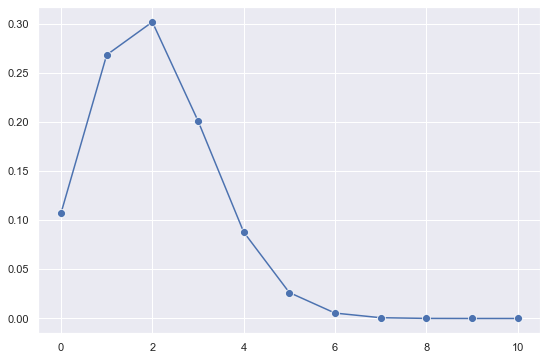

In [25]:
# полигон распределения вероятностей
k = range(n+1)
plt.figure(figsize=(9, 6))
sns.lineplot(data=rv.pmf(k), marker='o', ms=8)
plt.show()

Вывод: Вероятность появления 2 бракованных деталей максимальна при данных условиях и равна

In [26]:
rv.pmf(2)  # 0.30198988800000004

0.30198988800000004

***

### __Геометрическое распределение__

__Задача__. _Два игрока поочередно бросают игральную кость. Выигрывает тот, к которого первым выпадает "6 очков". Какова вероятность выигрыша игрока, бросающего игральную кость первым? Вторым?_

__Решение__. Число $k$ испытаний, проведенных по схеме Бернулли, с вероятностью $p$ наступления события в каждом испытании до первого положительного исхода представляет собой случайную величину ($X$), имеющую геометрическое распределение: она принимает значения $1, 2, ..., k, ...$ с вероятностями $P(X=k)=pq^{k-1}$, где $q=1-p$. Сумма ряда геометрического распределения $p+pq+...+pq^{k-1}+...=1$. Очевидно, что вероятность выигрыша игрока, бросающего игральную кость первым, равна сумме нечетных членов ряда ($k=1, 3,...$), вторым - четных. Посчитаем сумму рядов в __`sympy`__. 

In [27]:
from fractions import Fraction
from sympy import Symbol, Sum, oo

Во-первых, убедимся, что $ \sum_{k=1}^{\infty} pq^{k-1} = 1$:

In [28]:
p = 1/6
q = 1 - p
k = Symbol('k')
Sum(p * q**(k-1), (k, 1, oo)).doit()  # 1

1.00000000000000

Чтобы просуммировать только нечетные элементы, умножим показатель степени при $q$ на 2:

In [29]:
# вероятность выигрыша игрока, бросающего игральную кость первым
sum_odd = Sum(p * q**(2*k-2), (k, 1, oo)).doit()
sum_odd  # 0.545454545454546

0.545454545454546

In [30]:
# в виде обыкновенной дроби
Fraction(float(sum_odd)).limit_denominator()  # 6/11

Fraction(6, 11)

In [31]:
# вероятность выигрыша игрока, бросающего игральную кость вторым
1 - sum_odd  # 0.454545454545454

0.454545454545454

In [32]:
# или сдвигом вдоль ряда
sum_even = Sum(p * q**(2*k-1), (k, 1, oo)).doit()
sum_even  # 0.454545454545455

0.454545454545455

In [33]:
sum_even == 5/11  # True

True

***